# Final Project Template 

# Dan's Final Project Template

## 7) Give me a problem statement.
Below, write a problem statement. Keep in mind that your task is to tease out relationships in your data and eventually build a predictive model. Your problem statement can be vague, but you should have a goal in mind. Your problem statement should be between one sentence and one paragraph.

Hemophagocytic lymphohistiocytosis (HLH) is a T-cell mediated inflammatory syndrome associated with immune activation and NK cell dysfunction. In the context of CAR T-cells, HLH occurs in a subset of those with cytokine release syndrome (CRS) and results in increased patient morbidity. HLH is often refactory to IL-6 blockade, the agent traditionally used to treat CAR T-cell related inflammatory toxicities, and requires the addition IL-1R blockade. Early intervention may result in decreased patient morbidity, yet predisposing factors for toxicity development are not yet well established. Here, I seek to use patient and product characteristics from an ongoing phase 1 study of CAR T-cells to develop a model to predict those at increased risk of HLH.

## 1) Get your data
You may use any data set(s) you like, so long as they meet these criteria:

* Your data must be publically available for free.
* Your data should be interesting to _you_. You want your final project to be something you're proud of.
* Your data should be "big enough":
    - It should have at least 1,000 rows.
    - It should have enough of columns to be interesting.
    - If you have questions, contact a member of the instructional team.

## 2) Provide a link to your data
Your data is required to be free and open to anyone.
As such, you should have a URL which anyone can use to download your data:

https://docs.google.com/spreadsheets/d/105tnzeA-DAopCogKvVu_GtYx8PbSncc7jJikEVNAcKg/edit?usp=sharing

In [1]:
from IPython.display import IFrame
IFrame(src="https://docs.google.com/spreadsheets/d/105tnzeA-DAopCogKvVu_GtYx8PbSncc7jJikEVNAcKg/edit?usp=sharing", width='100%', height='500px')

## 3) Import your data
In the space below, import your data.
If your data span multiple files, read them all in.
If applicable, merge or append them as needed.

In [654]:
#!pip install xgboost 
import pandas as pd
#import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline
import xgboost as xgb
import re

df = pd.read_csv("DL_Final_Proj.csv")

In [655]:
df.describe()

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
count,67.000000,67.000000,60.000000,60.000000,62.000000,59.00000,59.000000,59.000000,57.000000,55.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,47.000000,47.000000,48.000000,48.000000,33.000000
mean,531.283582,0.119403,0.350000,0.866667,0.677419,0.40678,0.254237,0.644068,52.621474,46.510909,...,1.271833,1.378292,1.215583,178.289583,177.705625,101.846383,0.974170,1.027875,21.425042,1176.578485
std,309.443969,0.326709,0.480995,0.342803,0.471280,0.49545,0.439169,0.482905,35.010957,31.727449,...,2.769635,1.187720,3.911200,423.783595,265.607171,161.177838,3.072776,1.425467,14.893415,1086.562946
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.050000,0.500000,...,0.230000,0.700000,0.110000,0.370000,5.630000,0.220000,0.210000,0.240000,4.750000,154.040000
25%,283.500000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,20.000000,14.100000,...,0.280000,0.717500,0.120000,5.890000,36.847500,14.730000,0.250000,0.292000,11.475000,636.880000
50%,556.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,1.000000,52.600000,52.600000,...,0.340000,0.792000,0.140000,21.415000,73.865000,38.070000,0.260000,0.730000,16.995000,889.340000
75%,812.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.500000,1.000000,87.000000,76.650000,...,0.837500,1.632500,0.811500,62.420000,164.895000,120.900000,0.435000,1.125000,27.025000,1161.360000
max,988.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,97.000000,...,17.740000,5.940000,27.070000,1530.000000,1198.000000,714.650000,20.900000,9.370000,66.940000,4961.220000


In [656]:
df.head()

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.6,14.8,...,3.03,0.70,0.11,2.34,199.24,3.81,0.27,0.25,18.92,NaN
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.0,16.4,...,0.35,1.63,0.12,39.16,143.12,56.94,0.39,1.15,15.07,746.89
2,16,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.0,14.8,...,0.81,1.14,0.13,4.07,36.78,1.83,0.80,0.77,5.05,NaN
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.6,54.1,...,0.33,2.65,2.65,12.28,20.61,31.58,0.30,0.73,11.59,633.19


In [657]:
df.tail()

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
62,934,0,0.0,1.0,1.0,1.0,0.0,1.0,27.0,6.6,...,0.27,1.44,1.44,58.33,74.84,13.90,0.36,0.80,27.00,1336.93
63,951,0,0.0,1.0,0.0,1.0,0.0,1.0,90.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,954,0,1.0,1.0,0.0,0.0,0.0,0.0,75.0,56.8,...,17.74,2.72,27.07,1472.00,1148.00,706.98,20.90,9.37,37.95,4373.75
65,985,0,1.0,1.0,0.0,0.0,1.0,1.0,85.0,88.9,...,0.29,0.71,0.12,29.58,105.35,45.08,0.25,0.76,15.81,1269.76
66,988,0,0.0,1.0,1.0,1.0,0.0,0.0,77.0,12.8,...,0.78,2.19,2.19,90.34,72.89,60.60,0.49,0.82,12.78,1389.20


In [658]:
df.dtypes

RANDOMIZED ID                           int64
Exclude from Analysis (0=No/1=Yes)      int64
HLH (0=No/1=Yes)                      float64
CRS (0=N/1=Y)                         float64
Prior HCT (0=N/1=Y)                   float64
                                       ...   
Cytokines_Day 9_IL-10                 float64
Cytokines_Day 9_IL-12p70              float64
Cytokines_Day 9_IL-13                 float64
Cytokines_Day 9_IL-15                 float64
Cytokines_Day 9_IL-18                 float64
Length: 143, dtype: object

In [659]:
#checking to make sure no object type variables 
df.select_dtypes(include='object')

""
0
1
2
3
4
...
62
63
64
65


In [660]:
df.shape

(67, 143)

In [661]:
#assigning pts who were not infused to be excluded
exclude = df[df['Exclude from Analysis (0=No/1=Yes)'] == 1].index
exclude

Int64Index([2, 7, 8, 17, 33, 45, 46, 58], dtype='int64')

In [662]:
#excluding non-infused pts, only infused (inf) remain
df_inf = df.drop(exclude, axis=0)
df_inf

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.600,14.8,...,3.030,0.700,0.110,2.34,199.24,3.81,0.270,0.250,18.920,NaN
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.000,16.4,...,0.350,1.630,0.120,39.16,143.12,56.94,0.390,1.150,15.070,746.89
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.000,14.8,...,0.810,1.140,0.130,4.07,36.78,1.83,0.800,0.770,5.050,NaN
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.600,54.1,...,0.330,2.650,2.650,12.28,20.61,31.58,0.300,0.730,11.590,633.19
5,41,0,0.0,1.0,1.0,0.0,0.0,1.0,0.400,69.6,...,0.330,2.960,0.130,5.83,16.75,23.53,0.300,0.730,6.970,NaN
6,49,0,0.0,0.0,0.0,0.0,0.0,1.0,35.100,40.4,...,0.280,0.750,0.140,1.09,445.00,0.22,0.240,0.240,7.410,NaN
9,95,0,1.0,1.0,0.0,1.0,0.0,0.0,0.630,96.2,...,0.280,0.720,0.120,20.40,40.59,40.41,0.260,0.410,39.410,889.34
10,143,0,1.0,1.0,1.0,0.0,1.0,0.0,42.200,51.5,...,0.350,0.700,0.140,27.12,40.97,168.55,0.250,0.240,39.480,NaN
11,145,0,0.0,1.0,0.0,0.0,0.0,1.0,60.000,75.0,...,0.920,0.720,0.310,168.60,120.03,117.50,0.450,0.280,13.480,1052.87
12,173,0,1.0,1.0,1.0,0.0,0.0,1.0,90.000,87.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [663]:
#looking at correlation generally
cor = df_inf.corr(method='spearman')
cor 

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-1B,Cytokines_Day 9_IL-2,Cytokines_Day 9_IL-4,Cytokines_Day 9_IL-6,Cytokines_Day 9_IL-8,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18
RANDOMIZED ID,1.000000,NaN,0.209952,0.243152,-0.077817,0.224897,-0.038858,-0.114331,0.287104,-0.182366,...,0.184241,0.045728,0.241140,0.347605,0.207794,0.227505,0.097445,0.260170,0.300879,0.431484
Exclude from Analysis (0=No/1=Yes),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HLH (0=No/1=Yes),0.209952,NaN,1.000000,0.272750,-0.122489,0.032978,0.135037,-0.186717,0.183565,0.207150,...,0.237171,-0.109639,-0.015036,0.370750,0.168819,0.378188,0.015571,0.054665,0.397220,0.286578
CRS (0=N/1=Y),0.243152,NaN,0.272750,1.000000,-0.015435,0.303822,-0.026523,-0.272750,0.107264,0.049599,...,0.186072,-0.094461,0.051350,0.310330,-0.137355,0.528719,0.015884,-0.030550,0.422240,NaN
Prior HCT (0=N/1=Y),-0.077817,NaN,-0.122489,-0.015435,1.000000,-0.050803,0.133255,-0.031274,0.155074,-0.146235,...,-0.131573,0.095678,-0.112560,-0.050362,0.043167,-0.136280,0.015454,0.145814,-0.071944,-0.078604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cytokines_Day 9_IL-10,0.227505,NaN,0.378188,0.528719,-0.136280,0.033032,0.067279,-0.241133,0.249975,-0.017140,...,0.345201,0.061109,0.265289,0.706096,0.246130,1.000000,0.207800,0.223272,0.582362,0.247326
Cytokines_Day 9_IL-12p70,0.097445,NaN,0.015571,0.015884,0.015454,0.098069,-0.104310,-0.046541,0.169418,-0.280819,...,0.573500,0.324798,0.375598,0.494098,0.332740,0.207800,1.000000,0.515694,0.162801,0.194739
Cytokines_Day 9_IL-13,0.260170,NaN,0.054665,-0.030550,0.145814,0.011113,0.201802,-0.020525,0.335844,-0.217986,...,0.272282,0.501904,0.463979,0.580684,0.588334,0.223272,0.515694,1.000000,0.208263,0.436026
Cytokines_Day 9_IL-15,0.300879,NaN,0.397220,0.422240,-0.071944,0.269658,0.270004,-0.097804,0.369559,-0.110927,...,0.277695,-0.028145,0.127398,0.589922,0.391073,0.582362,0.162801,0.208263,1.000000,0.242981


In [664]:
#Correlation with output variable
cor_target = abs(cor["HLH (0=No/1=Yes)"])

#Selecting highly correlated features
corr50_features, corr40_features, corr30_features = cor_target[cor_target>0.5], cor_target[cor_target>0.4], cor_target[cor_target>0.3]
print(corr30_features)

HLH (0=No/1=Yes)                          1.000000
Baseline BM_T:NK Ratio                    0.454762
TCS (0=No/1=Yes)                          0.399399
Max Grade CRS                             0.447424
 Ferritin_Day 5 (ng/mL) [4-6]             0.402709
 Ferritin_Day 9 (ng/mL) [8-10]            0.439016
Toci (0=N/1=Y)                            0.562667
TBNK_Baseline_T:NK Ratio                  0.311811
TBNK_Baseline_CD8:NK Ratio                0.322209
TBNK_Day 0 [-1-2]_1_T:NK Ratio            0.370530
TBNK_Day 0 [-1-2]_1_CD8:NK Ratio          0.482388
TBNK_Day 0 [-1-2]_1_%NK                   0.409056
CAR EXPANSION (% of T Cells)_Day 10-14    0.315226
Prod_%CD3_PS_PT                           0.333418
Prod_Cx Day 7_%CD3                        0.353579
Prod_Cx Day 7_%NK                         0.472912
Prod_Cx Day Final_%CD3                    0.358045
Prod_Cx Day Final_%NK                     0.319209
CBC_Day CRS_mono (abs)                    0.304395
Cytokines_Day 0_IL-18          

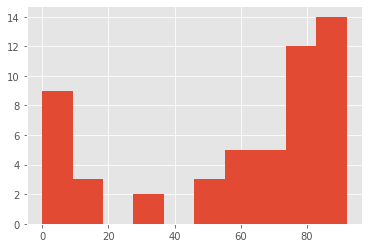

In [665]:
#visualizing histograms of data
#df_inf.iloc[:, 2:17].hist()
df_inf["CAR EXPANSION (% of T Cells)_Day 10-14"].hist()
pl.show()


In [666]:
#visualizing HLH by grade of CRS, making dummy variables for each

pd.crosstab(df_inf['HLH (0=No/1=Yes)'], df_inf['Max Grade CRS'], rownames=['HLH_infused'])

dummy_ranks = pd.get_dummies(df_inf['Max Grade CRS'], prefix='Max Grade CRS')
dummy_ranks.head()
cols_to_keep = df_inf.drop(columns='Max Grade CRS')
cols_to_keep

df_crs = cols_to_keep.join(dummy_ranks.iloc[:,:])
df_crs.head()
df_crs


,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-10,Cytokines_Day 9_IL-12p70,Cytokines_Day 9_IL-13,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18,Max Grade CRS_0.0,Max Grade CRS_1.0,Max Grade CRS_2.0,Max Grade CRS_3.0,Max Grade CRS_4.0
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.600,14.8,...,3.81,0.270,0.250,18.920,NaN,0,1,0,0,0
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.000,16.4,...,56.94,0.390,1.150,15.070,746.89,0,1,0,0,0
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.000,14.8,...,1.83,0.800,0.770,5.050,NaN,1,0,0,0,0
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.600,54.1,...,31.58,0.300,0.730,11.590,633.19,0,0,1,0,0
5,41,0,0.0,1.0,1.0,0.0,0.0,1.0,0.400,69.6,...,23.53,0.300,0.730,6.970,NaN,0,1,0,0,0
6,49,0,0.0,0.0,0.0,0.0,0.0,1.0,35.100,40.4,...,0.22,0.240,0.240,7.410,NaN,1,0,0,0,0
9,95,0,1.0,1.0,0.0,1.0,0.0,0.0,0.630,96.2,...,40.41,0.260,0.410,39.410,889.34,0,0,1,0,0
10,143,0,1.0,1.0,1.0,0.0,1.0,0.0,42.200,51.5,...,168.55,0.250,0.240,39.480,NaN,0,0,1,0,0
11,145,0,0.0,1.0,0.0,0.0,0.0,1.0,60.000,75.0,...,117.50,0.450,0.280,13.480,1052.87,0,0,1,0,0
12,173,0,1.0,1.0,1.0,0.0,0.0,1.0,90.000,87.9,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0


In [667]:
#visualizing HLH by dose level, making dummy variables for each

pd.crosstab(df_crs['HLH (0=No/1=Yes)'], df_inf['Dose Level'], rownames=['HLH_infused'])

dummy_ranks2 = pd.get_dummies(df_crs['Dose Level'], prefix='Dose Level')
dummy_ranks2.head()
cols_to_keep2 = df_crs.drop(columns='Dose Level')
cols_to_keep2

df_fin = cols_to_keep2.join(dummy_ranks2.iloc[:,:])
df_fin.head()
df_fin

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18,Max Grade CRS_0.0,Max Grade CRS_1.0,Max Grade CRS_2.0,Max Grade CRS_3.0,Max Grade CRS_4.0,Dose Level_1.0,Dose Level_2.0,Dose Level_3.0
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.600,14.8,...,18.920,NaN,0,1,0,0,0,1,0,0
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.000,16.4,...,15.070,746.89,0,1,0,0,0,0,0,1
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.000,14.8,...,5.050,NaN,1,0,0,0,0,1,0,0
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.600,54.1,...,11.590,633.19,0,0,1,0,0,0,1,0
5,41,0,0.0,1.0,1.0,0.0,0.0,1.0,0.400,69.6,...,6.970,NaN,0,1,0,0,0,1,0,0
6,49,0,0.0,0.0,0.0,0.0,0.0,1.0,35.100,40.4,...,7.410,NaN,1,0,0,0,0,0,1,0
9,95,0,1.0,1.0,0.0,1.0,0.0,0.0,0.630,96.2,...,39.410,889.34,0,0,1,0,0,1,0,0
10,143,0,1.0,1.0,1.0,0.0,1.0,0.0,42.200,51.5,...,39.480,NaN,0,0,1,0,0,1,0,0
11,145,0,0.0,1.0,0.0,0.0,0.0,1.0,60.000,75.0,...,13.480,1052.87,0,0,1,0,0,1,0,0
12,173,0,1.0,1.0,1.0,0.0,0.0,1.0,90.000,87.9,...,NaN,NaN,0,0,1,0,0,1,0,0


## 4) Show me the head of your data.

In [668]:
df_fin.head()

,RANDOMIZED ID,Exclude from Analysis (0=No/1=Yes),HLH (0=No/1=Yes),CRS (0=N/1=Y),Prior HCT (0=N/1=Y),Prior Blina (0=N/1=Y),Prior Ino (0=N/1=Y),Prior CAR (0=N/1=Y),Bone marrow_%Leukemia,Baseline BM_%T cell,...,Cytokines_Day 9_IL-15,Cytokines_Day 9_IL-18,Max Grade CRS_0.0,Max Grade CRS_1.0,Max Grade CRS_2.0,Max Grade CRS_3.0,Max Grade CRS_4.0,Dose Level_1.0,Dose Level_2.0,Dose Level_3.0
0,6,0,0.0,1.0,1.0,1.0,1.0,1.0,19.6,14.8,...,18.92,NaN,0,1,0,0,0,1,0,0
1,9,0,0.0,1.0,1.0,1.0,1.0,1.0,42.0,16.4,...,15.07,746.89,0,1,0,0,0,0,0,1
3,25,0,0.0,0.0,1.0,0.0,0.0,1.0,78.0,14.8,...,5.05,NaN,1,0,0,0,0,1,0,0
4,37,0,0.0,1.0,1.0,1.0,0.0,0.0,2.6,54.1,...,11.59,633.19,0,0,1,0,0,0,1,0
5,41,0,0.0,1.0,1.0,0.0,0.0,1.0,0.4,69.6,...,6.97,NaN,0,1,0,0,0,1,0,0


## 5) Show me the shape of your data

In [669]:
df_fin.shape

(59, 149)

## 6) Show me the proportion of missing observations for each column of your data

In [670]:
df_fin.isna().sum()
#df_fin.notna().sum()

RANDOMIZED ID                         0
Exclude from Analysis (0=No/1=Yes)    0
HLH (0=No/1=Yes)                      0
CRS (0=N/1=Y)                         0
Prior HCT (0=N/1=Y)                   0
                                     ..
Max Grade CRS_3.0                     0
Max Grade CRS_4.0                     0
Dose Level_1.0                        0
Dose Level_2.0                        0
Dose Level_3.0                        0
Length: 149, dtype: int64

In [671]:
df_fin.isna().sum().sum()

1313

In [672]:
df_fin.notna().sum().sum()

7478

In [673]:
#determining % of missing data
df_fin.isna().sum().sum() / (df_fin.isna().sum().sum() + df_fin.notna().sum().sum())

0.14935729723580934

In [674]:
#looking at correlation generally
cor2 = df_fin.corr(method='spearman')
cor2 

#Correlation with output variable
cor_target2 = abs(cor2["HLH (0=No/1=Yes)"])

#Selecting highly correlated features
corr2_50_features, corr2_40_features, corr2_30_features = cor_target2[cor_target2>0.5], cor_target2[cor_target2>0.4], cor_target2[cor_target2>0.3]
print(corr2_30_features)

HLH (0=No/1=Yes)                          1.000000
Baseline BM_T:NK Ratio                    0.454762
TCS (0=No/1=Yes)                          0.399399
 Ferritin_Day 5 (ng/mL) [4-6]             0.402709
 Ferritin_Day 9 (ng/mL) [8-10]            0.439016
Toci (0=N/1=Y)                            0.562667
TBNK_Baseline_T:NK Ratio                  0.311811
TBNK_Baseline_CD8:NK Ratio                0.322209
TBNK_Day 0 [-1-2]_1_T:NK Ratio            0.370530
TBNK_Day 0 [-1-2]_1_CD8:NK Ratio          0.482388
TBNK_Day 0 [-1-2]_1_%NK                   0.409056
CAR EXPANSION (% of T Cells)_Day 10-14    0.315226
Prod_%CD3_PS_PT                           0.333418
Prod_Cx Day 7_%CD3                        0.353579
Prod_Cx Day 7_%NK                         0.472912
Prod_Cx Day Final_%CD3                    0.358045
Prod_Cx Day Final_%NK                     0.319209
CBC_Day CRS_mono (abs)                    0.304395
Cytokines_Day 0_IL-18                     0.392677
Cytokines_Day 5_GM-CSF         

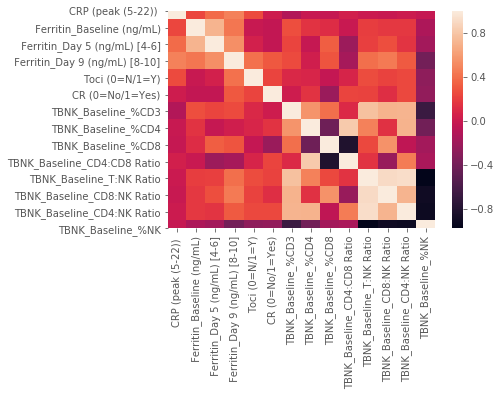

In [675]:
#heatmap of variables
#sns.heatmap(df_fin.iloc[:, 2:15].corr(method='spearman'))
sns.heatmap(df_fin.iloc[:, 16:30].corr(method='spearman'))

#there are a lot of variables that correlate with eachoteher, will have to deal with that
#eg since %NK feeds into T:NK ratios, etc

In [676]:
#dealing with error resulting from ' and < symbols in columns
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df_fin.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df_fin.columns.values]

## 8) What is your _y_-variable?
For final project, you will need to perform a statistical model. This means you will have to accurately predict some y-variable for some combination of x-variables. From your problem statement in part 7, what is that y-variable?

#### HLH

In [677]:
#assigning predictors (X) and target (y)
X = df_fin.drop(columns=['HLH (0=No/1=Yes)', 'Exclude from Analysis (0=No/1=Yes)', 'RANDOMIZED ID', 'Toci (0=N/1=Y)'], axis=1); X
y = df_fin['HLH (0=No/1=Yes)']; y
X.shape, df_fin.shape, y.shape

((59, 145), (59, 149), (59,))

In [678]:
from sklearn.model_selection import train_test_split

#reproducibility
test_size = .33
cv=3
seed=42

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [679]:
#xgboost for df_fin dataset using xgboost as model b/c built in method to deal with missing values
from xgboost.sklearn import XGBClassifier
X_dmatrix = xgb.DMatrix(data=X,label=y)
X_train_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
X_test_dmatrix = xgb.DMatrix(data=X_test, label=y_test)

xg_class = xgb.XGBClassifier(objective ='binary:logistic', random_state = seed, cv=cv)

xg_class.fit(X_train,y_train)

preds = xg_class.predict(X_test)

preds



array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 0.])

In [680]:
#looking at classification report to see how model did
from sklearn.metrics import classification_report
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79        13
         1.0       0.60      0.43      0.50         7

    accuracy                           0.70        20
   macro avg       0.67      0.64      0.64        20
weighted avg       0.69      0.70      0.69        20



In [681]:
# train-test split evaluation of xgboost model (default params)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.00%


In [717]:
HLH_neg = df_fin[df_fin['HLH (0=No/1=Yes)'] == 0].index
HLH_pos = df_fin[df_fin['HLH (0=No/1=Yes)'] == 1].index

#HLH_incidence
HLH_pos.size/(HLH_pos.size + HLH_neg.size)

#so, if always guess HLH- expect ~65% accuracy

0.3559322033898305

In [732]:
# k-fold cross validation evaluation of xgboost model (default params)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#X, y = df_fin.iloc[:,3:],df_fin.iloc[:,2] #X=predictors (dataset sans target); y=target

kfold = KFold(n_splits=cv, random_state=seed)
results_def = cross_val_score(xg_class, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results_def.mean()*100, results_def.std()*100))
results_def

Accuracy: 69.47% (4.15%)


array([0.75      , 0.65      , 0.68421053])

In [719]:
# stratified k-fold cross validation evaluation of xgboost model (default params)
from sklearn.model_selection import StratifiedKFold

#X, y = df_fin.iloc[:,3:],df_fin.iloc[:,2] #X=predictors (dataset sans target); y=target

kfold_strat = StratifiedKFold(n_splits=cv, random_state=seed)
results_strat = cross_val_score(xg_class, X, y, cv=kfold_strat)
print("Accuracy: %.2f%% (%.2f%%)" % (results_strat.mean()*100, results_strat.std()*100))
results_strat

Accuracy: 72.98% (5.87%)


array([0.65      , 0.75      , 0.78947368])

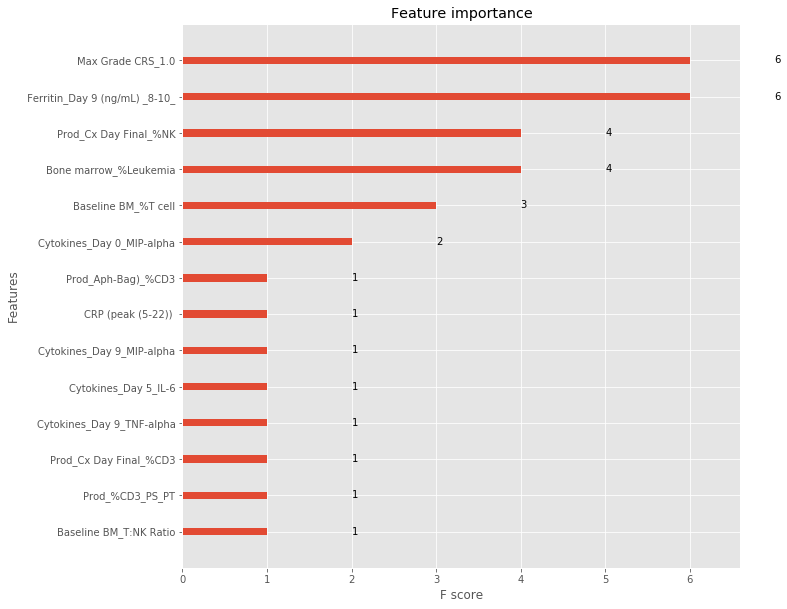

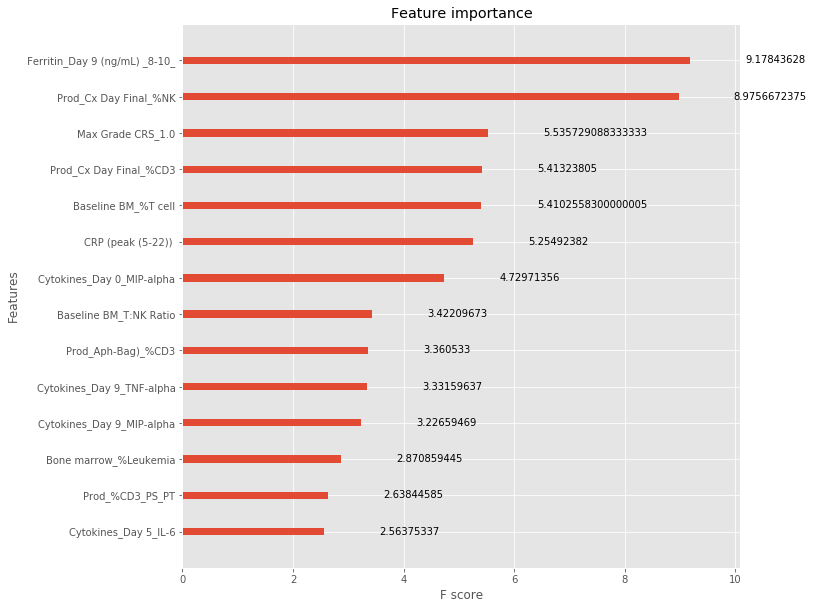

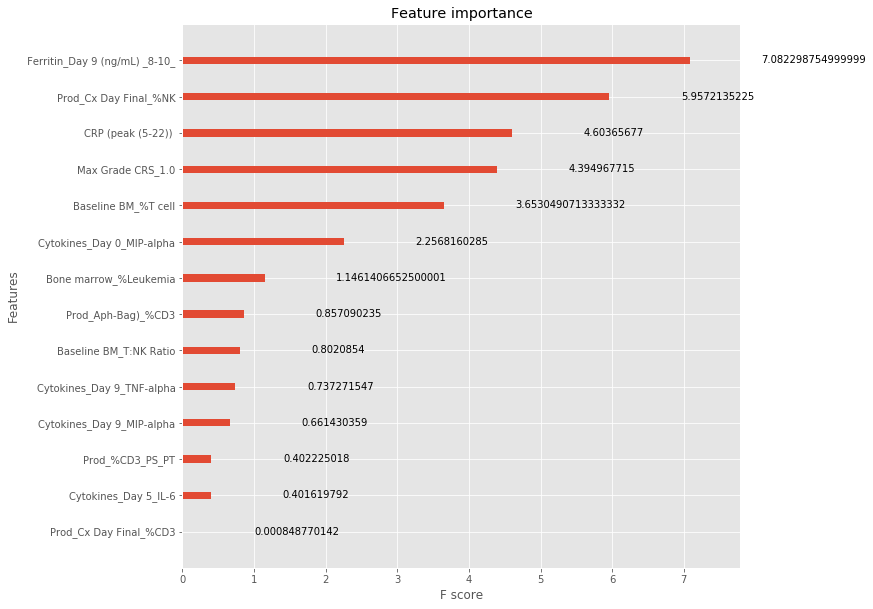

In [720]:
#ft importance of test set w/ default params
import matplotlib.pyplot as plt

params_default = {'max_depth': 3,'learning_rate': 0.1, 'n_estimators' : 100, 'verbosity':1, 'booster': 'gbtree', 'n_jobs' :1, 'gamma': 0,  "objective":"binary:logistic",'colsample_bytree': 1, 'scale_pos_weight' : 1, 
           'min_child_weight': 1, 'max_delta_step': 0, 'subsample':1, 'colsample_bytree':1, 'colsample_bylevel':1, 'colsample_bynode':1, 
          'reg_alpha':0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'base_score': .5, 'random_state': seed,  'cv' : cv}
    

xg_classifier_train = xgb.train(params= params_default, dtrain = X_train_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_classifier_train, importance_type = 'weight'), xgb.plot_importance(xg_classifier_train, importance_type = 'cover'), xgb.plot_importance(xg_classifier_train, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

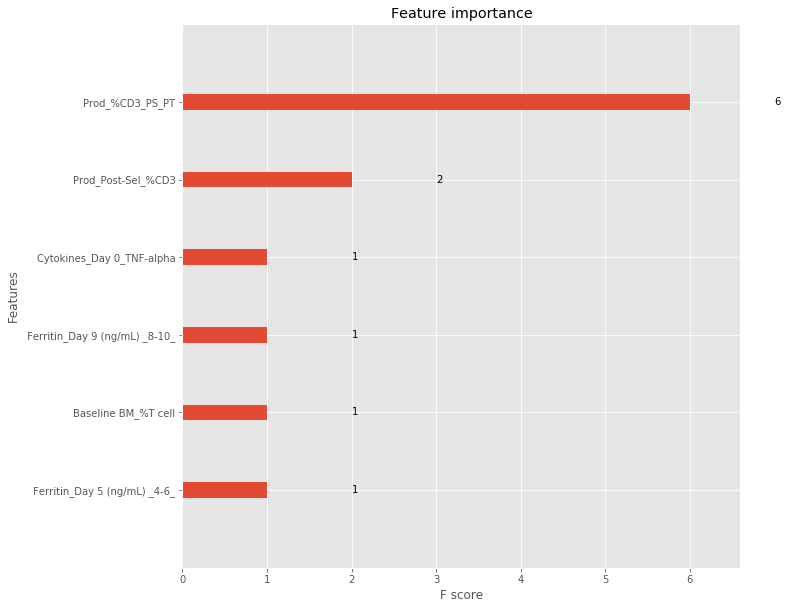

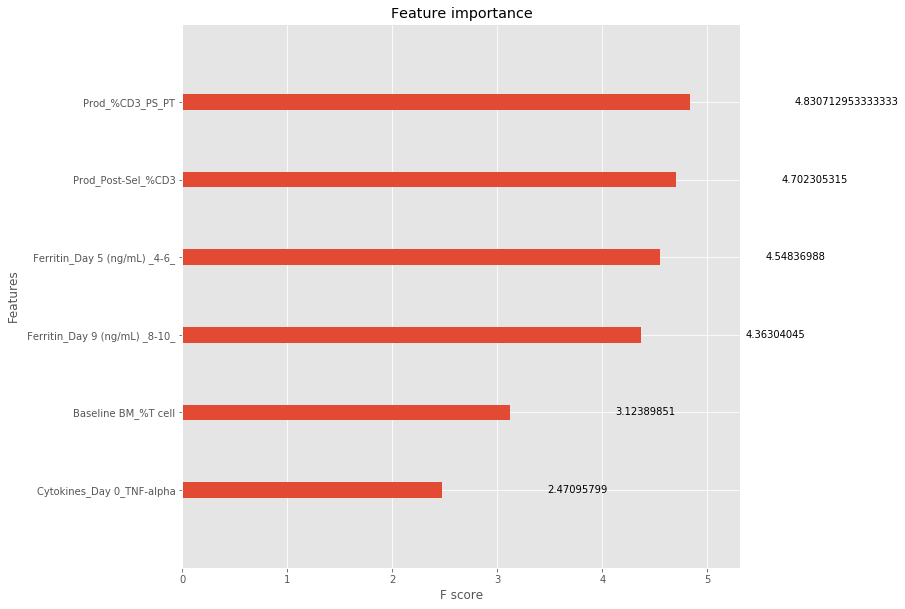

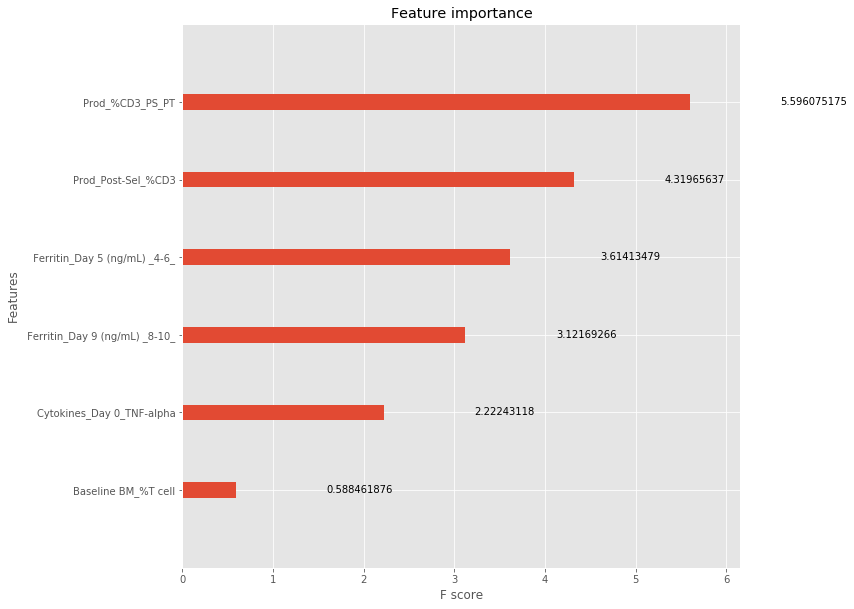

In [721]:
#ft importance of test set w/ default params
import matplotlib.pyplot as plt

params_default = {'max_depth': 3,'learning_rate': 0.1, 'n_estimators' : 100, 'verbosity':1, 'booster': 'gbtree', 'n_jobs' :1, 'gamma': 0,  "objective":"binary:logistic",'colsample_bytree': 1, 'scale_pos_weight' : 1, 
           'min_child_weight': 1, 'max_delta_step': 0, 'subsample':1, 'colsample_bytree':1, 'colsample_bylevel':1, 'colsample_bynode':1, 
          'reg_alpha':0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'base_score': .5, 'random_state': seed,  'cv' : cv}
    

xg_classifier_test = xgb.train(params= params_default, dtrain = X_test_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_classifier_test, importance_type = 'weight'), xgb.plot_importance(xg_classifier_test, importance_type = 'cover'), xgb.plot_importance(xg_classifier_test, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

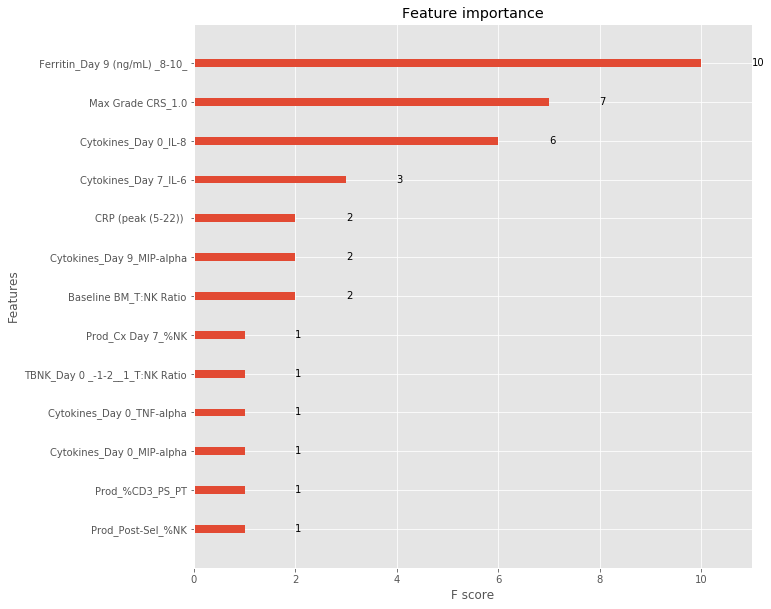

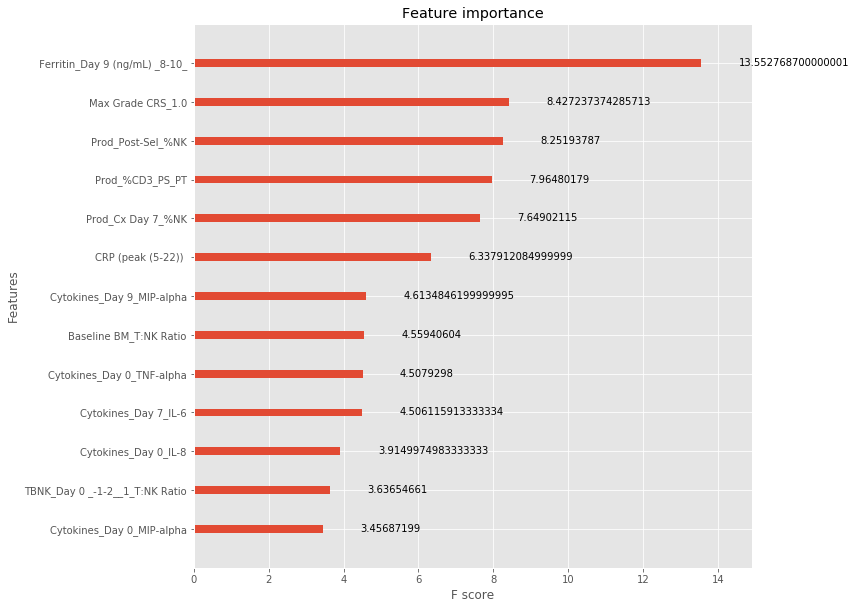

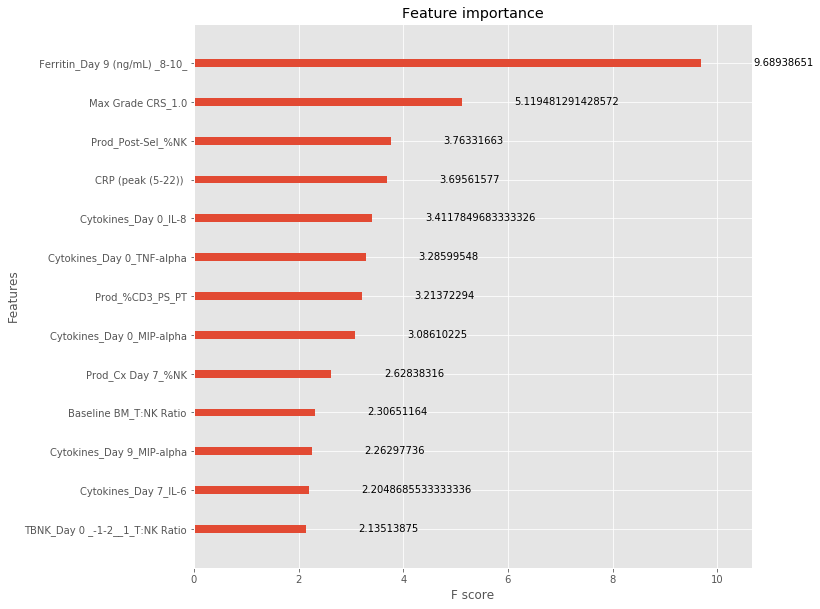

In [722]:
#ft importance of overall set w/ default params
import matplotlib.pyplot as plt

params_default = {'max_depth': 3,'learning_rate': 0.1, 'n_estimators' : 100, 'verbosity':1, 'booster': 'gbtree', 'n_jobs' :1, 'gamma': 0,  "objective":"binary:logistic",'colsample_bytree': 1, 'scale_pos_weight' : 1, 
           'min_child_weight': 1, 'max_delta_step': 0, 'subsample':1, 'colsample_bytree':1, 'colsample_bylevel':1, 'colsample_bynode':1, 
          'reg_alpha':0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'base_score': .5, 'random_state': seed,  'cv' : cv}
    

xg_classifier = xgb.train(params= params_default, dtrain = X_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_classifier, importance_type = 'weight'), xgb.plot_importance(xg_classifier, importance_type = 'cover'), xgb.plot_importance(xg_classifier, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [723]:
#alt way of looking @ important fts


#model = xg_class
#model.fit(X, y)
#pd.DataFrame({'Variable':X.columns,
#              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

[0]	validation_0-error:0.102564	validation_0-logloss:0.637052	validation_1-error:0.25	validation_1-logloss:0.653401
[1]	validation_0-error:0.102564	validation_0-logloss:0.588751	validation_1-error:0.25	validation_1-logloss:0.620425
[2]	validation_0-error:0.025641	validation_0-logloss:0.548031	validation_1-error:0.3	validation_1-logloss:0.611077
[3]	validation_0-error:0.025641	validation_0-logloss:0.512774	validation_1-error:0.25	validation_1-logloss:0.579988
[4]	validation_0-error:0.025641	validation_0-logloss:0.480887	validation_1-error:0.3	validation_1-logloss:0.575492
[5]	validation_0-error:0.025641	validation_0-logloss:0.452508	validation_1-error:0.25	validation_1-logloss:0.555952
[6]	validation_0-error:0.025641	validation_0-logloss:0.426525	validation_1-error:0.25	validation_1-logloss:0.559825
[7]	validation_0-error:0.025641	validation_0-logloss:0.40319	validation_1-error:0.25	validation_1-logloss:0.542381
[8]	validation_0-error:0.025641	validation_0-logloss:0.382344	validation_1-

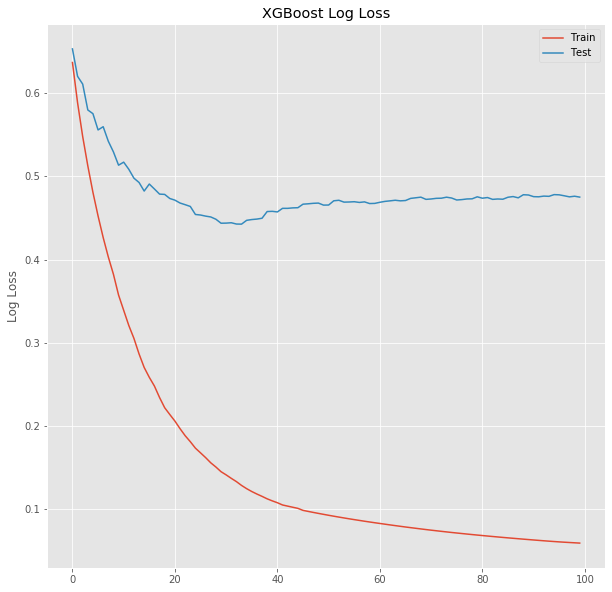

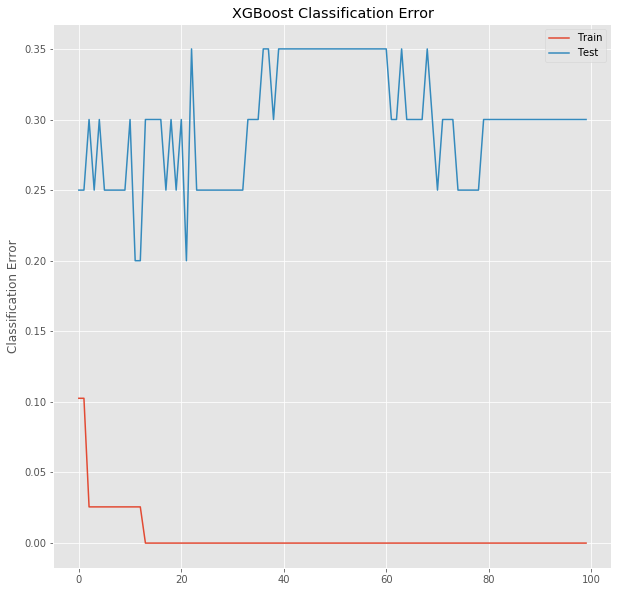

In [724]:
#classification error rate and log loss of default parameters

model = xg_class
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

# Hyperparameter tuning

In [432]:
#tuning 'max_depth' and 'min_child_weight'
from sklearn.model_selection import GridSearchCV

param_test1 = {
 'max_depth':range(1,15,2),
 'min_child_weight':range(0,10,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([0.10239259, 0.10351833, 0.09101637, 0.07323798, 0.07856226,
         0.24647148, 0.1264654 , 0.10319646, 0.08076223, 0.06565801,
         0.23215087, 0.08331561, 0.06539011, 0.07600848, 0.11354415,
         0.28352125, 0.11242398, 0.08158739, 0.06987429, 0.07718603,
         0.20118666, 0.09276358, 0.06813272, 0.09920144, 0.09768597,
         0.22649201, 0.08698996, 0.07246828, 0.06675673, 0.06639369,
         0.20776232, 0.08387335, 0.06804347, 0.0641013 , 0.04967499]),
  'std_fit_time': array([0.01455383, 0.01330871, 0.00456876, 0.01324278, 0.01420989,
         0.01991499, 0.03604241, 0.02309484, 0.01485893, 0.00388201,
         0.01686688, 0.00718564, 0.00896207, 0.01606706, 0.00927402,
         0.027691  , 0.02502934, 0.00965806, 0.00404323, 0.00813187,
         0.02400186, 0.00199193, 0.00280475, 0.00874477, 0.00725588,
         0.01092738, 0.00674833, 0.00655472, 0.00239665, 0.00165172,
         0.0132575 , 0.0029861 , 0.00297876, 0.00220825, 0.00596606]

In [433]:
#further tuning min_child_weight and max_depth

param_test1a = {
 'max_depth':[0, 1, 2, 3, 4, 5],
 'min_child_weight':[i/10.0 for i in range (0,40)]
}
gsearch1a = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed), 
 param_grid = param_test1a, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch1a.fit(X_train,y_train)
gsearch1a.cv_results_, gsearch1a.best_params_, gsearch1a.best_score_



({'mean_fit_time': array([0.03260326, 0.05009929, 0.05889805, 0.04814792, 0.04444901,
         0.04847129, 0.04744593, 0.04179708, 0.03442637, 0.03479044,
         0.03841567, 0.0351421 , 0.03566368, 0.03955499, 0.03156837,
         0.03069305, 0.03487055, 0.03346531, 0.02943206, 0.03305825,
         0.03987932, 0.03415092, 0.03544728, 0.03948267, 0.03442025,
         0.03408662, 0.03228331, 0.03216338, 0.03320702, 0.03873142,
         0.03353063, 0.03372526, 0.03373067, 0.03433212, 0.04181894,
         0.03165921, 0.03149891, 0.03198465, 0.03350695, 0.03125087,
         0.09443736, 0.10117364, 0.07702208, 0.08091935, 0.07908829,
         0.07907136, 0.07934888, 0.07223527, 0.07721806, 0.07782809,
         0.07567334, 0.07838599, 0.07569385, 0.07844631, 0.07671626,
         0.06992928, 0.07026196, 0.08064469, 0.06983534, 0.06704903,
         0.06881706, 0.07064088, 0.0709192 , 0.06386765, 0.06776555,
         0.06893333, 0.07212504, 0.07053725, 0.06845331, 0.06505346,
         0.058974

In [434]:
#tuning 'gamma' using identified 'max_depth' and 'min_child_weight'
max_depth_tune = 2
min_child_weight_tune = .5
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv}
param_test2 = {
 'gamma':[i/10.0 for i in range(0,100)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch2.fit(X_train, y_train)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.14464068, 0.16899212, 0.16479635, 0.13287687, 0.1466674 ,
         0.1259404 , 0.14278062, 0.11743458, 0.13289571, 0.1277647 ,
         0.13671708, 0.12094665, 0.13371762, 0.12911526, 0.13562624,
         0.13832339, 0.1299022 , 0.13112195, 0.14986173, 0.13856498,
         0.13687174, 0.14624159, 0.13690416, 0.1336755 , 0.1331861 ,
         0.12444592, 0.12432273, 0.1257139 , 0.12629565, 0.12951287,
         0.12823939, 0.12818209, 0.1271464 , 0.12769453, 0.1261789 ,
         0.12748138, 0.134372  , 0.12714696, 0.13067007, 0.12582135,
         0.13299672, 0.13875   , 0.14461517, 0.12465938, 0.12857461,
         0.12493165, 0.12908498, 0.13348754, 0.12746159, 0.12127002,
         0.13956229, 0.1353298 , 0.12219334, 0.12400389, 0.12796513,
         0.12619559, 0.13414804, 0.12476595, 0.12990991, 0.13168764,
         0.12520266, 0.13108293, 0.12871567, 0.13170401, 0.12357402,
         0.1248095 , 0.13456607, 0.12939103, 0.12435929, 0.1371266 ,
         0.126172

In [435]:
#tuning 'subsample' and 'colsample_bytree' w/ identified 'gamma', 'max_depth' and 'min_child_weight'
gamma_tune = 4
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune}
param_test3 = {
 'subsample':[i/10.0 for i in range(0,10)],
 'colsample_bytree':[i/10.0 for i in range(0,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch3.fit(X_train, y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_


({'mean_fit_time': array([0.03120097, 0.04852867, 0.05065735, 0.04910755, 0.05234043,
         0.05189228, 0.04667783, 0.05163097, 0.05423069, 0.04737099,
         0.05246107, 0.0426054 , 0.04297312, 0.04076338, 0.04842313,
         0.0449179 , 0.04615299, 0.04265571, 0.05216344, 0.04695082,
         0.03860299, 0.0387183 , 0.04548955, 0.04604554, 0.05093924,
         0.04920014, 0.06088869, 0.05147592, 0.05376697, 0.05666598,
         0.04296192, 0.04419374, 0.0462234 , 0.05035575, 0.05981207,
         0.05734261, 0.05669228, 0.06373938, 0.06322114, 0.06226897,
         0.04409806, 0.04486362, 0.06804665, 0.05721339, 0.06029431,
         0.06173229, 0.06891712, 0.06850751, 0.06965995, 0.07785185,
         0.05326438, 0.05111861, 0.05543311, 0.06350549, 0.06944561,
         0.07245628, 0.07383927, 0.0791564 , 0.07832766, 0.08740648,
         0.0478917 , 0.05487672, 0.05951866, 0.07346622, 0.07272665,
         0.08137894, 0.08935666, 0.09007366, 0.11708395, 0.09085528,
         0.063525

In [436]:
#tuning subsample in .05 intervals around determined values

param_test4 = {
 'subsample':[i/100.0 for i in range(80,100,5)],
 'colsample_bytree':[i/100.0 for i in range(20,60,5)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch4.fit(X_train,y_train)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

#subsample and colsample_bytree changed

({'mean_fit_time': array([0.06517466, 0.08406997, 0.09567038, 0.06089441, 0.0899876 ,
         0.0753487 , 0.09247367, 0.05561272, 0.06383864, 0.0627687 ,
         0.06164559, 0.06458243, 0.07167959, 0.07342664, 0.06841127,
         0.06324577, 0.07031337, 0.07307974, 0.07444056, 0.07684422,
         0.08174435, 0.07632232, 0.0858051 , 0.08284322, 0.08631468,
         0.08303245, 0.08357604, 0.08331776, 0.08296641, 0.07486439,
         0.05927904, 0.05788366]),
  'std_fit_time': array([0.00633777, 0.00807078, 0.00605781, 0.00762004, 0.02320507,
         0.02056783, 0.012499  , 0.00452001, 0.00456004, 0.00644816,
         0.00584995, 0.00602758, 0.00361484, 0.00489551, 0.00379665,
         0.00299965, 0.00313177, 0.00016155, 0.00778656, 0.00564315,
         0.00187871, 0.00338203, 0.00323623, 0.0026646 , 0.01144278,
         0.00469698, 0.00380393, 0.0031834 , 0.00351897, 0.00442322,
         0.0103248 , 0.00798361]),
  'mean_score_time': array([0.01774367, 0.014045  , 0.02535892, 0.010

In [444]:
#tuning regularization parameters
subsample_tune = .85
colsample_bytree_tune = .4
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune}

param_test5 = {
 'reg_alpha':[0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 100]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch5.fit(X_train,y_train)
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([0.08380946, 0.11165285, 0.10254169, 0.11191575, 0.08818865,
         0.11334062, 0.10830172, 0.106028  , 0.04380393]),
  'std_fit_time': array([0.01567135, 0.02020465, 0.02500992, 0.0059122 , 0.01562996,
         0.00994905, 0.0059185 , 0.01009608, 0.01313386]),
  'mean_score_time': array([0.01625427, 0.01730967, 0.01388764, 0.02098393, 0.01271542,
         0.01803366, 0.01988538, 0.01303339, 0.00914574]),
  'std_score_time': array([0.00111779, 0.00698867, 0.00233641, 0.00395194, 0.00186914,
         0.00268273, 0.00900935, 0.00177512, 0.00357597]),
  'param_reg_alpha': masked_array(data=[0, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 0},
   {'reg_alpha': 1e-06},
   {'reg_alpha': 1e-05},
   {'reg_alpha': 0.0001},
   {'reg_alpha': 0.001},
   {'reg_alpha': 0.01},
   {'reg_a

In [445]:
#tuning alpha more finely parameters

#param_test6 = {
# 'reg_alpha':[0, .001, .005, .01, .05, .1, .15, .2, .25, .5]
#}
#gsearch6 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=max_depth_tune,
# min_child_weight=min_child_weight_tune, gamma=gamma_tune, subsample=subsample_tune, colsample_bytree=colsample_bytree_tune,
# objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=seed), 
# param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
#gsearch6.fit(X,y)
#gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_
##reg alpha uncahged

In [446]:
#tuning learning rate
reg_alpha_tune = 0

params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'reg_alpha': reg_alpha_tune}
param_test7 = {
 'learning_rate':[1e-06, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, .2, .3, .5, 1]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch7.fit(X_train,y_train)
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_
#changed

({'mean_fit_time': array([0.09125209, 0.10473434, 0.10507568, 0.08233563, 0.09083072,
         0.11165206, 0.14199138, 0.12004606, 0.07135598, 0.05910508]),
  'std_fit_time': array([0.00769671, 0.00149119, 0.0092683 , 0.01932017, 0.01326506,
         0.02727536, 0.0136582 , 0.02215813, 0.00546754, 0.013032  ]),
  'mean_score_time': array([0.01592223, 0.01779366, 0.0146021 , 0.01294367, 0.01137129,
         0.02308297, 0.01511931, 0.019672  , 0.00864998, 0.00754857]),
  'std_score_time': array([0.00255825, 0.00180218, 0.00269197, 0.002446  , 0.00093683,
         0.00217708, 0.00319375, 0.00099998, 0.00156633, 0.00076912]),
  'param_learning_rate': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5,
                     1],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 1e-06},
   {'learning_rate': 1e-05},
   {'learni

In [447]:
#tuning learning rate more finely
param_test7a = {
 'learning_rate':[.1, .15, .2, .25, .3]
}
gsearch7a = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, learning_rate = .2), 
 param_grid = param_test7a, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch7a.fit(X_train,y_train)
gsearch7a.cv_results_, gsearch7a.best_params_, gsearch7a.best_score_
#unchanged

({'mean_fit_time': array([0.08609668, 0.10145903, 0.10538061, 0.08252931, 0.09036605]),
  'std_fit_time': array([0.00528226, 0.0040905 , 0.00556014, 0.01153915, 0.01543465]),
  'mean_score_time': array([0.01606695, 0.02495933, 0.01374658, 0.01318765, 0.01022975]),
  'std_score_time': array([0.00423208, 0.0055745 , 0.00257596, 0.00461933, 0.00299411]),
  'param_learning_rate': masked_array(data=[0.1, 0.15, 0.2, 0.25, 0.3],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.1},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2},
   {'learning_rate': 0.25},
   {'learning_rate': 0.3}],
  'split0_test_score': array([0.86666667, 0.91111111, 0.95555556, 0.92222222, 0.94444444]),
  'split1_test_score': array([0.6875, 0.6125, 0.6875, 0.6375, 0.6875]),
  'split2_test_score': array([0.78125 , 0.765625, 0.765625, 0.90625 , 0.75    ]),
  'mean_test_score': array([0.77847222, 0.7630787 , 0.80289352, 0.821

In [489]:
#tuning n_estimators
learning_rate_tune = .25
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'learning_rate':learning_rate_tune}

param_test8 = {
 'n_estimators':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100, 115, 125, 150, 175, 200, 350, 400, 450, 500]
}
gsearch8 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, learning_rate = learning_rate_tune), 
 param_grid = param_test8, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch8.fit(X_train,y_train)
gsearch8.cv_results_, gsearch8.best_params_, gsearch8.best_score_
#changed

({'mean_fit_time': array([0.01478187, 0.01564527, 0.01800696, 0.01688814, 0.0191234 ,
         0.02200675, 0.01863805, 0.01757367, 0.02122005, 0.02453907,
         0.02265   , 0.02517994, 0.02644475, 0.02314274, 0.02145036,
         0.03038963, 0.02878737, 0.03430637, 0.03234935, 0.03488763,
         0.03969765, 0.04025992, 0.05435014, 0.0722967 , 0.07785098,
         0.08404326, 0.09788068, 0.10483424, 0.1183246 , 0.15746411,
         0.14459165, 0.21090786, 0.17924166]),
  'std_fit_time': array([4.82997572e-05, 3.24960996e-04, 2.81572882e-03, 1.73275131e-03,
         5.14343697e-03, 4.31769793e-03, 1.57560679e-03, 2.05795089e-04,
         1.14846178e-03, 1.65026209e-03, 1.89595519e-03, 5.11162436e-03,
         3.69812841e-03, 3.04355647e-03, 2.96500459e-03, 2.17616124e-03,
         4.36277011e-03, 3.98942512e-03, 9.09215829e-04, 1.05291310e-03,
         5.20538947e-03, 1.13389056e-03, 1.19495208e-03, 6.46382064e-03,
         1.92983696e-03, 6.76996122e-04, 2.51850159e-03, 1.12153244e

In [546]:
#tuning colsample_bynode, colsample_bylevel

n_estimators_tune = 30
params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'learning_rate':learning_rate_tune, 'n_testimators': n_estimators_tune}
param_test9 = {
 'colsample_bynode': [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
    'colsample_bylevel': [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
}
gsearch9 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, 
                                                  learning_rate = learning_rate_tune, n_estimators = n_estimators_tune), 
 param_grid = param_test9, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch9.fit(X_train,y_train)
gsearch9.cv_results_, gsearch9.best_params_, gsearch9.best_score_
#changed

({'mean_fit_time': array([0.02222927, 0.03533538, 0.03024515, 0.03759138, 0.0257442 ,
         0.036925  , 0.02855873, 0.03449965, 0.02818823, 0.03117299,
         0.0301036 , 0.03300929, 0.03503291, 0.02831642, 0.0236644 ,
         0.03800273, 0.03671741, 0.02046537, 0.02054509, 0.0364457 ,
         0.02031819, 0.02013652, 0.01828663, 0.02771799, 0.02044463,
         0.02236136, 0.02756405, 0.01919524, 0.02063139, 0.0235134 ,
         0.021029  , 0.03134878, 0.0301586 , 0.0214649 , 0.03177333,
         0.02879421, 0.02614792, 0.02147834, 0.0378267 , 0.02530448,
         0.0218815 , 0.03424096, 0.03665098, 0.02440858, 0.02106905,
         0.02126726, 0.02453017, 0.01907158, 0.02114495, 0.02471129,
         0.02157505, 0.02360296, 0.02562388, 0.02315434, 0.02517509,
         0.02081156, 0.02397227, 0.02028473, 0.02215354, 0.02625736,
         0.02200794, 0.02412168, 0.03658406, 0.02339371, 0.02915136,
         0.03340944, 0.02209433, 0.0201486 , 0.02092894, 0.0329593 ,
         0.024376

In [491]:
#tuning reg_lambda and verbosity

colsample_bylevel_tune = 1
colsample_bynode_tune = 1

param_test10 = {
 'verbosity': [0, 1, 2, 3],
    'reg_lambda': [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 100]
}
gsearch10 = GridSearchCV(estimator = XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, 
                                                  learning_rate = learning_rate_tune, n_estimators = n_estimators_tune, colsample_bynode = colsample_bynode_tune, colsample_bylevel = colsample_bylevel_tune), 
 param_grid = param_test10, scoring='roc_auc',n_jobs=4,iid=False, cv=cv)
gsearch10.fit(X_train,y_train)
gsearch10.cv_results_, gsearch10.best_params_, gsearch10.best_score_
#changed

({'mean_fit_time': array([0.02410825, 0.02186823, 0.02530543, 0.02224628, 0.02125486,
         0.01815351, 0.02053134, 0.01797207, 0.01822392, 0.016366  ,
         0.02596307, 0.0222284 , 0.01670225, 0.01712402, 0.01716153,
         0.02299937, 0.0135874 , 0.01561602, 0.02620125, 0.01498095,
         0.01595434, 0.01579698, 0.02465733, 0.01660474, 0.01608102,
         0.0158395 , 0.02019596, 0.02280656, 0.0141147 , 0.02136914,
         0.01970228, 0.0197405 , 0.01777697, 0.01633422, 0.01432665,
         0.01210403, 0.00999578, 0.01197704, 0.01116204, 0.01252389]),
  'std_fit_time': array([0.00248598, 0.00261099, 0.00203291, 0.00781621, 0.00635931,
         0.00425227, 0.00337975, 0.00420161, 0.00268615, 0.00471889,
         0.01153629, 0.00011973, 0.00348545, 0.00493409, 0.00426083,
         0.00789181, 0.00041347, 0.00252342, 0.01764389, 0.00121881,
         0.00242134, 0.00239286, 0.01021507, 0.00259172, 0.00174091,
         0.0026944 , 0.00714593, 0.00556866, 0.00066736, 0.01007957,

In [689]:
reg_lambda_tune =0
verbosity_tune = 0

params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
              'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'learning_rate':learning_rate_tune, 'n_estimators': n_estimators_tune,
              'colsample_bynode': colsample_bynode_tune, 'colsample_bylevel': colsample_bylevel_tune, 'reg_lambda': reg_lambda_tune, 'verbosity': verbosity_tune}

In [725]:
#rerunning model with TUNED HYPERPARAMETER SCORES


xg_class_tuned = xgb.XGBClassifier(cv = cv, random_state = seed, max_depth = max_depth_tune, min_child_weight = min_child_weight_tune, gamma = gamma_tune,
                                                 colsample_bytree = colsample_bytree_tune, subsample = subsample_tune, reg_alpha = reg_alpha_tune, 
                                                  learning_rate = learning_rate_tune, n_estimators = 6, colsample_bynode = colsample_bynode_tune, 
                               colsample_bylevel = colsample_bylevel_tune, reg_lambda = reg_lambda_tune, verbosity = verbosity_tune) 

In [726]:
xg_class_tuned.fit(X_train,y_train)

preds = xg_class_tuned.predict(X_test)

preds

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0.])

In [727]:
#looking at classification report to see how TUNED model did
from sklearn.metrics import classification_report
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

         0.0       0.75      0.92      0.83        13
         1.0       0.75      0.43      0.55         7

    accuracy                           0.75        20
   macro avg       0.75      0.68      0.69        20
weighted avg       0.75      0.75      0.73        20



In [728]:
# train-test split evaluation of xgboost model (tuned params)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.00%


In [733]:
# k-fold cross validation evaluation of TUNED xgboost model
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score


#kfold = KFold(n_splits=cv, random_state=seed)
results_tuned = cross_val_score(xg_class_tuned, X, y, cv=kfold)
print("New Accuracy: %.2f%% (%.2f%%)" % (results_tuned.mean()*100, results_tuned.std()*100))


#compared to k-fold cross validation of default
print("Compared to accuracy of default: %.2f%% (%.2f%%)" % (results_def.mean()*100, results_def.std()*100))

results_tuned


New Accuracy: 72.63% (11.19%)
Compared to accuracy of default: 69.47% (4.15%)


array([0.85      , 0.75      , 0.57894737])

In [734]:
# stratified k-fold cross validation evaluation of xgboost model
#from sklearn.model_selection import StratifiedKFold


#kfold_strat = StratifiedKFold(n_splits=cv, random_state=seed)
results_strat_tuned = cross_val_score(xg_class_tuned, X, y, cv=kfold_strat)
print("Accuracy: %.2f%% (%.2f%%)" % (results_strat_tuned.mean()*100, results_strat_tuned.std()*100))
print("Compared to accuracy of default: %.2f%% (%.2f%%)" % (results_strat.mean()*100, results_strat.std()*100))

results_strat_tuned

Accuracy: 74.39% (8.93%)
Compared to accuracy of default: 72.98% (5.87%)


array([0.85      , 0.75      , 0.63157895])

In [735]:
xg_class_tuned.fit(X_train, y_train)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
16,Ferritin_Day 9 (ng/mL) _8-10_,0.136277
6,Baseline BM_%T cell,0.099032
138,Max Grade CRS_1.0,0.089347
13,CRP (peak (5-22)),0.071941
67,Prod_Cx Day Final_%NK,0.057951
...,...,...
49,Prod_Aph-Bag)_T:NK Ratio,0.000000
48,Prod_Aph-Bag)_%NK,0.000000
47,Prod_Aph-Bag)_CD4:CD8 Ratio,0.000000
45,Prod_Aph-Bag)_%CD4,0.000000


In [736]:
#important variables for test set are very different from that of training set...could explain inaccuracy
#might be worth limiting # of features avail to start

xg_class_tuned.fit(X_test, y_test)
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
16,Ferritin_Day 9 (ng/mL) _8-10_,0.136277
6,Baseline BM_%T cell,0.099032
138,Max Grade CRS_1.0,0.089347
13,CRP (peak (5-22)),0.071941
67,Prod_Cx Day Final_%NK,0.057951
...,...,...
49,Prod_Aph-Bag)_T:NK Ratio,0.000000
48,Prod_Aph-Bag)_%NK,0.000000
47,Prod_Aph-Bag)_CD4:CD8 Ratio,0.000000
45,Prod_Aph-Bag)_%CD4,0.000000


In [737]:
#unsure why this isn't working

#params_tune = {'max_depth': max_depth_tune,'min_child_weight': min_child_weight_tune, 'random_state': seed,  'cv' : cv, 'gamma':gamma_tune,
 #             'colsample_bytree': colsample_bytree_tune, 'subsample': subsample_tune, 'learning_rate':learning_rate_tune, 'n_estimators': n_estimators_tune,
  #            'colsample_bynode': colsample_bynode_tune, 'colsample_bylevel': colsample_bylevel_tune, 'reg_lambda': reg_lambda_tune, 'verbosity': verbosity_tune}

xg_classifier_tune_test = xgb.train(params= params_tune, dtrain = X_test_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_classifier_tune_test, importance_type = 'weight'), xgb.plot_importance(xg_classifier_tune_test, importance_type = 'cover'), xgb.plot_importance(xg_classifier_tune_test, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()




ValueError: Booster.get_score() results in empty

In [699]:
#unsure why this isn't working

xg_classif_tune_train = xgb.train(params= params_tune, dtrain = X_train_dmatrix, num_boost_round=10)

xgb.plot_importance(xg_classif_tune_train, importance_type = 'weight'), xgb.plot_importance(xg_classif_tune_train, importance_type = 'cover'), xgb.plot_importance(xg_classif_tune_train, importance_type = 'gain') #total_gain, #total_cover

plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

ValueError: Booster.get_score() results in empty

[0]	validation_0-error:0.153846	validation_0-logloss:0.564461	validation_1-error:0.4	validation_1-logloss:0.66353
[1]	validation_0-error:0.128205	validation_0-logloss:0.456765	validation_1-error:0.35	validation_1-logloss:0.585801
[2]	validation_0-error:0.076923	validation_0-logloss:0.367157	validation_1-error:0.2	validation_1-logloss:0.519579
[3]	validation_0-error:0.051282	validation_0-logloss:0.316013	validation_1-error:0.3	validation_1-logloss:0.515831
[4]	validation_0-error:0.051282	validation_0-logloss:0.31148	validation_1-error:0.3	validation_1-logloss:0.518462
[5]	validation_0-error:0.025641	validation_0-logloss:0.268567	validation_1-error:0.25	validation_1-logloss:0.55471
Accuracy: 75.00%


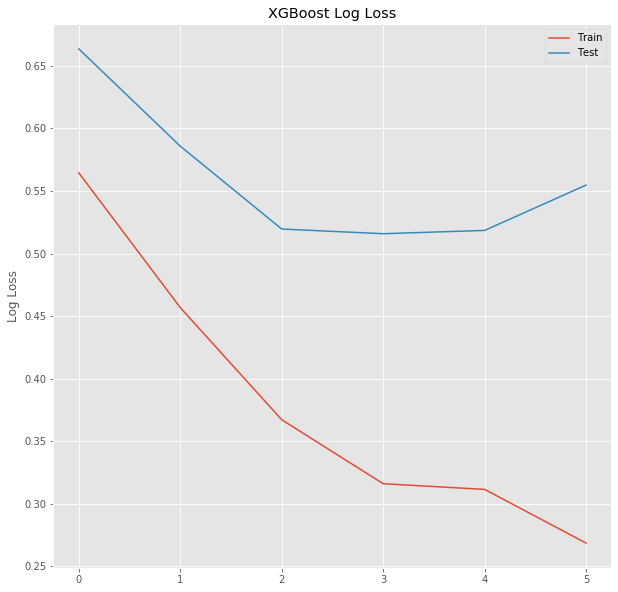

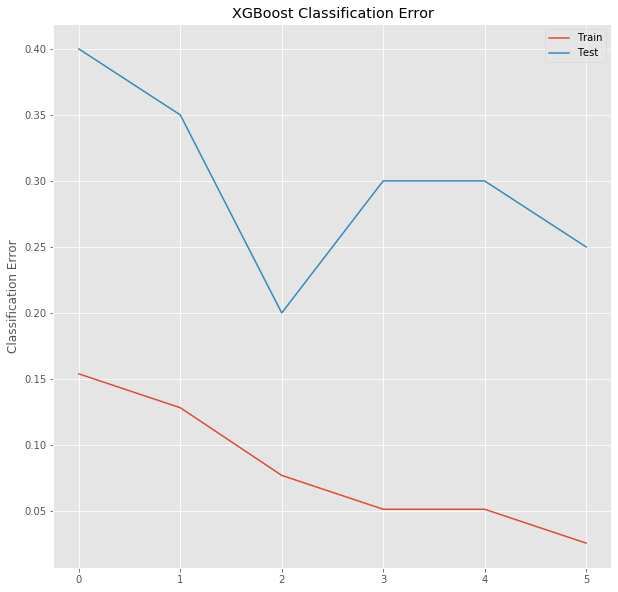

In [738]:

# plot learning curve for tuned dataset
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

model = xg_class_tuned
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()



##
##
##HOW TO MAKE EPOCHS = 2 ??##

[0]	validation_0-error:0.102564	validation_0-logloss:0.637052	validation_1-error:0.25	validation_1-logloss:0.653401
[1]	validation_0-error:0.102564	validation_0-logloss:0.588751	validation_1-error:0.25	validation_1-logloss:0.620425
[2]	validation_0-error:0.025641	validation_0-logloss:0.548031	validation_1-error:0.3	validation_1-logloss:0.611077
[3]	validation_0-error:0.025641	validation_0-logloss:0.512774	validation_1-error:0.25	validation_1-logloss:0.579988
[4]	validation_0-error:0.025641	validation_0-logloss:0.480887	validation_1-error:0.3	validation_1-logloss:0.575492
[5]	validation_0-error:0.025641	validation_0-logloss:0.452508	validation_1-error:0.25	validation_1-logloss:0.555952
[6]	validation_0-error:0.025641	validation_0-logloss:0.426525	validation_1-error:0.25	validation_1-logloss:0.559825
[7]	validation_0-error:0.025641	validation_0-logloss:0.40319	validation_1-error:0.25	validation_1-logloss:0.542381
[8]	validation_0-error:0.025641	validation_0-logloss:0.382344	validation_1-

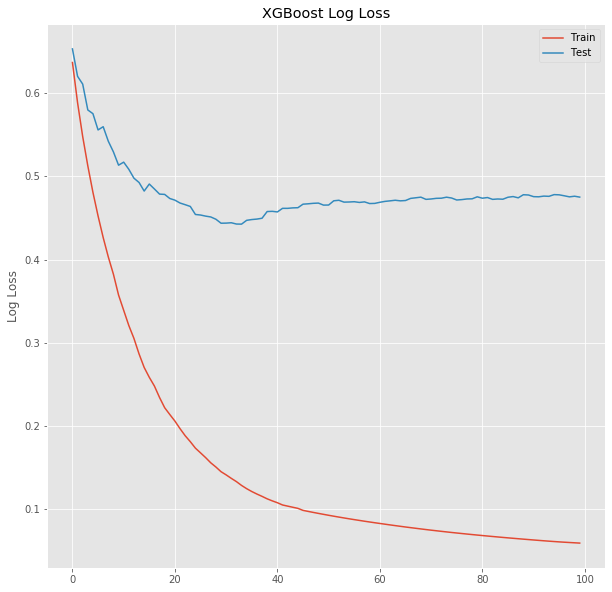

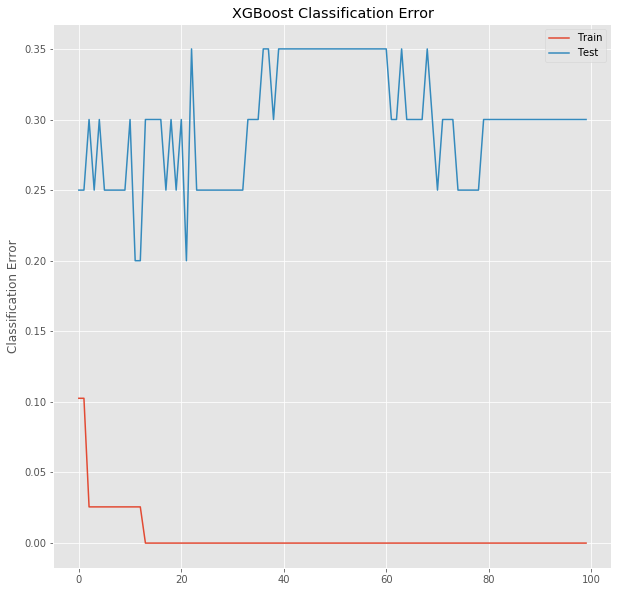

In [739]:
#default parameters for comparison

model = xg_class
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

# Remaining To Do


## Additional Modeling
-XGboost
- model with fewer parameters to start

-Log Reg +/- RF
- with MICE (Multivariate Imputation via Chained Equations)
-without MICE (recreating prior model)

## Prospective Validation (Eventually)
- Additional 5-10 pts in cohort
    - Determine best way to plug in new data
    
## Other
- Figure out how to show and isolate columns with a certain proportion of missing data or above 
- print decision trees!

# Limitations
- Small Dataset